In [2]:
import pandas as pd
import sklearn.model_selection
from datasets import load_dataset

c:\Users\macty\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("mstz/wine", "wine")

Found cached dataset wine (C:/Users/macty/.cache/huggingface/datasets/mstz___wine/wine/1.0.0/7c3844cac7ac7a22d5fbbaf60fc1d4e9c9deb1b9b9c4dbae6a7b1a962dbc96d8)
100%|██████████| 1/1 [00:00<00:00, 49.24it/s]


In [4]:
dataset["train"]

Dataset({
    features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'is_red'],
    num_rows: 6497
})

In [5]:
wine_dataset = pd.DataFrame(dataset["train"])

In [6]:
wine_dataset.head()# podgląd danych

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  is_red  
0      9.4        5       0  
1      9.8        5       0  
2      9.8        5       0  
3      9.8        6       0  
4      9.4        5       0

In [7]:
wine_dataset.describe(include='all')

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality       is_red  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

<Axes: >

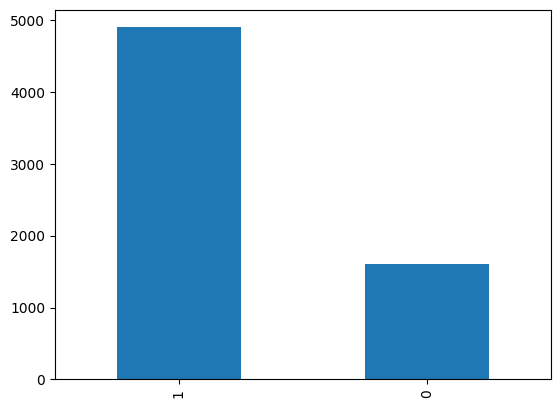

In [8]:
wine_dataset["is_red"].value_counts().plot(kind="bar")




In [9]:
wine_dataset["fixed_acidity"].std()

1.2964337577998153

In [10]:
import numpy as np
np.where(pd.isnull(wine_dataset))## sprawdzanie czy istnieją puste wartości

(array([], dtype=int64), array([], dtype=int64))

In [11]:
for column in wine_dataset.columns:
    wine_dataset[column] = wine_dataset[column]  / wine_dataset[column].abs().max() # normalizacja

In [12]:
wine_dataset.describe(include='all') # sprawdzanie wartości po znormalizowaniu

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        0.453793          0.214978     0.191948        0.082724   
std         0.081537          0.104200     0.087541        0.072307   
min         0.238994          0.050633     0.000000        0.009119   
25%         0.402516          0.145570     0.150602        0.027356   
50%         0.440252          0.183544     0.186747        0.045593   
75%         0.484277          0.253165     0.234940        0.123100   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.091708             0.105624              0.263056     0.957378   
std       0.057338             0.061417              0.128459     0.002886   
min       0.014730             0.003460              0.013636     0.950076   
25%       0.062193             0.058824              0.175000     0.955110   
50%       0.076923             0.100346              0.268182     0.957564   
75%       0.106383             0.141869              0.354545     0.959585   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality       is_red  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      0.802619     0.265634     0.704148     0.646486     0.753886  
std       0.040097     0.074403     0.080048     0.097028     0.430779  
min       0.678304     0.110000     0.536913     0.333333     0.000000  
25%       0.775561     0.215000     0.637584     0.555556     1.000000  
50%       0.800499     0.255000     0.691275     0.666667     1.000000  
75%       0.827930     0.300000     0.758389     0.666667     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [13]:
wine_dataset["fixed_acidity"].nlargest(10) #sprawdza czy najwyższe wartości mają sens

652     1.000000
442     0.981132
557     0.981132
554     0.974843
555     0.974843
243     0.943396
244     0.943396
544     0.899371
3125    0.893082
374     0.880503
Name: fixed_acidity, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
wine_train, wine_test = sklearn.model_selection.train_test_split(wine_dataset, test_size=0.1, random_state=1, stratify=wine_dataset["is_red"])
wine_train["is_red"].value_counts() 
# podzielenie na train i test

1.0    4408
0.0    1439
Name: is_red, dtype: int64

In [15]:
wine_test["is_red"].value_counts()

1.0    490
0.0    160
Name: is_red, dtype: int64

In [16]:
wine_test, wine_val = sklearn.model_selection.train_test_split(wine_test, test_size=0.5, random_state=1, stratify=wine_test["is_red"]) # podzielenie na test i validation

In [17]:
wine_test["is_red"].value_counts()

1.0    245
0.0     80
Name: is_red, dtype: int64

In [18]:
wine_val["is_red"].value_counts()

1.0    245
0.0     80
Name: is_red, dtype: int64

In [19]:
import seaborn as sns
sns.set_theme()

In [20]:
len(wine_dataset.columns)

13

In [21]:
#sns.pairplot(data=wine_dataset, hue="is_red")

In [22]:
wine_test.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     325.000000        325.000000   325.000000      325.000000   
mean        0.448244          0.217069     0.180630        0.078990   
std         0.074301          0.107627     0.078046        0.070045   
min         0.314465          0.063291     0.000000        0.012158   
25%         0.402516          0.145570     0.144578        0.027356   
50%         0.433962          0.177215     0.180723        0.042553   
75%         0.471698          0.253165     0.222892        0.113982   
max         0.817610          0.569620     0.445783        0.334347   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  325.000000           325.000000            325.000000  325.000000   
mean     0.088742             0.103024              0.257462    0.957255   
std      0.051400             0.054750              0.125165    0.002786   
min      0.031097             0.010381              0.020455    0.951116   
25%      0.060556             0.058824              0.168182    0.955168   
50%      0.078560             0.100346              0.261364    0.957478   
75%      0.101473             0.141869              0.343182    0.959354   
max      0.679214             0.231834              0.575000    0.965264   

               pH   sulphates     alcohol     quality      is_red  
count  325.000000  325.000000  325.000000  325.000000  325.000000  
mean     0.803553    0.263877    0.703930    0.646154    0.753846  
std      0.039808    0.072275    0.078704    0.095014    0.431433  
min      0.713217    0.130000    0.570470    0.333333    0.000000  
25%      0.775561    0.210000    0.637584    0.555556    1.000000  
50%      0.800499    0.250000    0.691275    0.666667    1.000000  
75%      0.827930    0.300000    0.758389    0.666667    1.000000  
max      0.917706    0.585000    0.939597    1.000000    1.000000

In [23]:
wine_train.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        0.453848          0.215061     0.192235        0.082331   
std         0.081742          0.104315     0.088036        0.071982   
min         0.238994          0.050633     0.000000        0.009119   
25%         0.402516          0.145570     0.150602        0.027356   
50%         0.440252          0.183544     0.186747        0.045593   
75%         0.484277          0.253165     0.234940        0.123100   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.092161             0.105659              0.262894     0.957364   
std       0.058619             0.061749              0.128256     0.002882   
min       0.014730             0.003460              0.013636     0.950076   
25%       0.062193             0.058824              0.176136     0.955071   
50%       0.076923             0.100346              0.268182     0.957516   
75%       0.106383             0.141869              0.353409     0.959581   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality       is_red  
count  5847.000000  5847.000000  5847.000000  5847.000000  5847.000000  
mean      0.802569     0.265798     0.704326     0.646732     0.753891  
std       0.039880     0.074864     0.079852     0.096928     0.430780  
min       0.678304     0.110000     0.536913     0.333333     0.000000  
25%       0.775561     0.215000     0.637584     0.555556     1.000000  
50%       0.800499     0.255000     0.691275     0.666667     1.000000  
75%       0.827930     0.300000     0.758389     0.666667     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [24]:
wine_val.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count     325.000000        325.000000   325.000000      325.000000   
mean        0.458355          0.211412     0.198091        0.093521   
std         0.084621          0.098749     0.086862        0.079346   
min         0.295597          0.056962     0.000000        0.012158   
25%         0.402516          0.145570     0.156627        0.030395   
50%         0.446541          0.183544     0.186747        0.069149   
75%         0.490566          0.253165     0.240964        0.133739   
max         0.943396          0.746835     0.445783        0.480243   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide     density  \
count  325.000000           325.000000            325.000000  325.000000   
mean     0.086537             0.107596              0.271556    0.957757   
std      0.035141             0.061805              0.135185    0.003031   
min      0.019640             0.010381              0.018182    0.950413   
25%      0.063830             0.055363              0.179545    0.955456   
50%      0.078560             0.100346              0.284091    0.957978   
75%      0.098200             0.155709              0.370455    0.960028   
max      0.278232             0.266436              0.570455    0.972396   

               pH   sulphates     alcohol     quality      is_red  
count  325.000000  325.000000  325.000000  325.000000  325.000000  
mean     0.802570    0.264446    0.701160    0.642393    0.753846  
std      0.044183    0.068086    0.084939    0.100957    0.431433  
min      0.715711    0.140000    0.563758    0.333333    0.000000  
25%      0.773067    0.215000    0.630872    0.555556    1.000000  
50%      0.800499    0.250000    0.684564    0.666667    1.000000  
75%      0.827930    0.305000    0.758389    0.666667    1.000000  
max      1.000000    0.570000    0.939597    0.888889    1.000000

In [25]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

In [26]:
class TabularDataset(Dataset):
    def __init__(self, data):
        self.data = data.values.astype('float32')

    def __getitem__(self, index):
        x = torch.tensor(self.data[index, :-1])
        y = torch.tensor(self.data[index, -1])
        return x, y

    def __len__(self):
        return len(self.data)

In [27]:
batch_size = 64
train_dataset = TabularDataset(wine_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TabularDataset(wine_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [28]:
class TabularModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TabularModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

In [29]:
input_dim = wine_train.shape[1] - 1
hidden_dim = 32
output_dim = 2
model = TabularModel(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [30]:
model = TabularModel(input_dim=len(wine_train.columns)-1, hidden_dim=32, output_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [31]:
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Print the loss every 1000 mini-batches
    if (epoch%2)  == 0:
        print(f'Epoch {epoch + 1}, loss: {running_loss / len(train_dataloader):.4f}')

print('Finished Training')

Epoch 1, loss: 0.5358
Epoch 3, loss: 0.3417
Epoch 5, loss: 0.3344
Epoch 7, loss: 0.3338
Epoch 9, loss: 0.3318
Finished Training


In [32]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = model(inputs.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy on test set: %d %%' % (100 * correct / total))

Accuracy on test set: 98 %
